### Import Libraries

In [16]:
# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection & Preprocessing
import os
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score


### Import Data

In [17]:
precv = pd.read_excel("d:/PROJECTS/Github/fd-prediction-for-commercial-firms/dataset/precovid.xlsx")

chosen_variables = ['Z','FD', 'RE/TA', 'NI/TA\n', 'CF', 'CA/TO', 'CL/TA\n', 'TD/TA', 'P/E', 'P/B', 'SIZE\n', 'AUR', 'AUP', 'AUD', 'AEM', 'INF', 'GDP', 'LIR']
precv = precv[chosen_variables]

In [18]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: d:\PROJECTS\Github\fd-prediction-for-commercial-firms\precovid


In [19]:
precv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Z       372 non-null    float64
 1   FD      372 non-null    int64  
 2   RE/TA   372 non-null    float64
 3   NI/TA
  372 non-null    float64
 4   CF      372 non-null    float64
 5   CA/TO   372 non-null    float64
 6   CL/TA
  372 non-null    float64
 7   TD/TA   372 non-null    float64
 8   P/E     372 non-null    float64
 9   P/B     372 non-null    float64
 10  SIZE
   372 non-null    float64
 11  AUR     372 non-null    int64  
 12  AUP     372 non-null    int64  
 13  AUD     372 non-null    int64  
 14  AEM     372 non-null    float64
 15  INF     372 non-null    float64
 16  GDP     372 non-null    int64  
 17  LIR     372 non-null    float64
dtypes: float64(13), int64(5)
memory usage: 52.4 KB


### Find missing values

In [20]:
# Number of missing values
column_names = precv.columns
for column in column_names:
    print(column + ' - ' + str(precv[column].isnull().sum()))
        
# Remove rows with NaN values
precv = precv.dropna()

# Number of missing values after removing NaN values
column_names = precv.columns
for column in column_names:
    print(column + ' - ' + str(precv[column].isnull().sum()))


Z - 0
FD - 0
RE/TA - 0
NI/TA
 - 0
CF - 0
CA/TO - 0
CL/TA
 - 0
TD/TA - 0
P/E - 0
P/B - 0
SIZE
 - 0
AUR - 0
AUP - 0
AUD - 0
AEM - 0
INF - 0
GDP - 0
LIR - 0
Z - 0
FD - 0
RE/TA - 0
NI/TA
 - 0
CF - 0
CA/TO - 0
CL/TA
 - 0
TD/TA - 0
P/E - 0
P/B - 0
SIZE
 - 0
AUR - 0
AUP - 0
AUD - 0
AEM - 0
INF - 0
GDP - 0
LIR - 0


### Z-score to handle Outliers

In [21]:
# Assume 'precv' is your DataFrame and 'FD' is the target variable
# Calculate Z-scores for each numeric column in the DataFrame
z_scores = np.abs((precv - precv.mean()) / precv.std())

# Define a threshold for outlier detection (e.g., 3 standard deviations from the mean)
threshold = 3

# Create a boolean mask for each row indicating whether it's an outlier or not
outlier_mask = (z_scores > threshold).any(axis=1)

# Filter out the outliers from the DataFrame
# processed_

precv = precv[~outlier_mask]

# processed_precv_length = len(processed_precv)
# precv_length = len(precv)

# Assuming 'FD' is the target variable, create the corresponding target variable without outliers
# y = processed_precv['FD']

# Drop the 'FD' column from the DataFrame to get the feature matrix without outliers
# x = processed_precv[features]


### Assign x & y

In [22]:
features = ['RE/TA', 'NI/TA\n', 'CF', 'CA/TO', 'CL/TA\n', 'TD/TA', 'P/E', 'P/B', 'SIZE\n', 'AUR', 'AUP', 'AUD', 'AEM', 'INF', 'GDP', 'LIR']
x = precv[features]
x.describe()

,RE/TA,NI/TA\n,CF,CA/TO,CL/TA\n,TD/TA,P/E,P/B,SIZE\n,AUR,AUP,AUD,AEM,INF,GDP,LIR
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.0,342.000000,342.000000,342.000000,342.000000
mean,-0.072038,0.024041,3.805415,1.145838,0.530647,29.776029,19.099187,0.855327,2.697702,0.134503,0.695906,1.0,-0.000297,2.896228,317.836257,7.548246
std,0.477410,0.096123,22.285962,0.793587,0.450008,25.743130,54.798446,1.381974,0.617622,0.341692,0.460696,0.0,0.147253,0.105147,14.019554,0.150210
min,-3.818847,-0.393939,-133.060000,0.021166,0.042052,0.000000,-103.100000,-9.730000,1.041393,0.000000,0.000000,1.0,-0.880000,2.790000,304.000000,7.400000
25%,-0.022183,0.000000,-2.632500,0.647794,0.282320,13.050000,0.000000,0.330000,2.276462,0.000000,0.000000,1.0,-0.075950,2.790000,304.000000,7.400000
50%,0.027360,0.020384,4.740000,1.019032,0.494277,25.670000,6.570000,0.670000,2.695919,0.000000,1.000000,1.0,-0.007058,3.000000,304.000000,7.400000
75%,0.075420,0.060432,11.575000,1.383163,0.672591,41.835000,14.790000,1.130000,3.033014,0.000000,1.000000,1.0,0.060255,3.000000,332.000000,7.700000
max,1.767196,0.724868,82.140000,4.300000,5.697917,273.900000,377.240000,10.900000,4.654985,1.000000,1.000000,1.0,0.782288,3.000000,332.000000,7.700000


In [23]:
y = precv.FD
y.describe()

count    342.000000
mean       0.450292
std        0.498252
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: FD, dtype: float64

### Data Splitting

In [24]:
x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, shuffle=False
)

### Descriptive Statistics

In [25]:
precv.describe()

,Z,FD,RE/TA,NI/TA\n,CF,CA/TO,CL/TA\n,TD/TA,P/E,P/B,SIZE\n,AUR,AUP,AUD,AEM,INF,GDP,LIR
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.0,342.000000,342.000000,342.000000,342.000000
mean,0.675439,0.450292,-0.072038,0.024041,3.805415,1.145838,0.530647,29.776029,19.099187,0.855327,2.697702,0.134503,0.695906,1.0,-0.000297,2.896228,317.836257,7.548246
std,0.405149,0.498252,0.477410,0.096123,22.285962,0.793587,0.450008,25.743130,54.798446,1.381974,0.617622,0.341692,0.460696,0.0,0.147253,0.105147,14.019554,0.150210
min,0.000000,0.000000,-3.818847,-0.393939,-133.060000,0.021166,0.042052,0.000000,-103.100000,-9.730000,1.041393,0.000000,0.000000,1.0,-0.880000,2.790000,304.000000,7.400000
25%,0.500000,0.000000,-0.022183,0.000000,-2.632500,0.647794,0.282320,13.050000,0.000000,0.330000,2.276462,0.000000,0.000000,1.0,-0.075950,2.790000,304.000000,7.400000
50%,1.000000,0.000000,0.027360,0.020384,4.740000,1.019032,0.494277,25.670000,6.570000,0.670000,2.695919,0.000000,1.000000,1.0,-0.007058,3.000000,304.000000,7.400000
75%,1.000000,1.000000,0.075420,0.060432,11.575000,1.383163,0.672591,41.835000,14.790000,1.130000,3.033014,0.000000,1.000000,1.0,0.060255,3.000000,332.000000,7.700000
max,1.000000,1.000000,1.767196,0.724868,82.140000,4.300000,5.697917,273.900000,377.240000,10.900000,4.654985,1.000000,1.000000,1.0,0.782288,3.000000,332.000000,7.700000


### Correlation Matrix

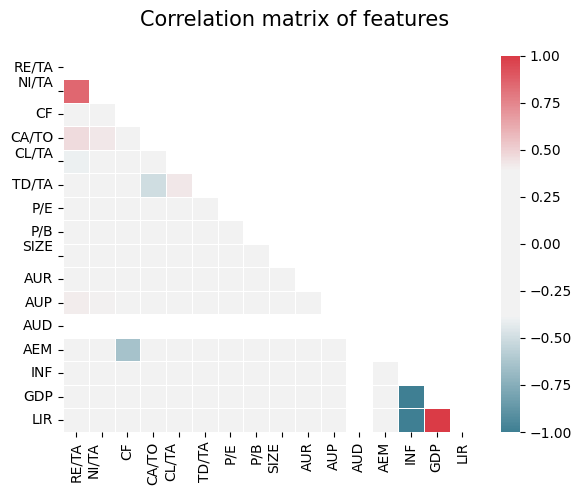

In [26]:
import matplotlib.pyplot as plt

corr = x.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
fig.tight_layout()

### Scale Data

In [27]:
from sklearn.preprocessing import StandardScaler
# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Compare ML Methods

In [28]:
# Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [29]:
# Initialize the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC()),
    ('Neural Network', MLPClassifier(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
]

# Initialize empty lists to store the evaluation results
results = []
conf_matrices = []
precisions = []
recalls = []
auc_scores = []
accuracies = []
roc_curves = []

# Iterate over each model
for name, model in models:
    # Fit the model on the scaled training data
    model.fit(x_train_scaled, y_train)

    # Make predictions on the scaled test data
    if isinstance(model, (LinearRegression, MLPClassifier)):
        # For regression models, convert predictions to binary using a threshold of 0.5
        y_pred = np.where(model.predict(x_test_scaled) >= 0.5, 1, 0)
    else:
        # For classification models, use direct predictions
        y_pred = model.predict(x_test_scaled)
        y_pred = np.where(y_pred >= 0.5, 1, 0)  # Ensure binary values

    # Calculate evaluation metrics
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # Append the results to the respective lists
    conf_matrices.append(cm)
    precisions.append(precision)
    recalls.append(recall)
    auc_scores.append(auc)
    accuracies.append(accuracy)
    roc_curves.append((fpr, tpr))

    # Append the results as a dictionary
    results.append({
        'Model': name,
        'Confusion Matrix': cm,
        'Recall': recall,
        'Precision': precision,
        'AUC': auc,
        'Accuracy': accuracy
    })


### Altman Z-score Evaluation

In [30]:
# Filter out rows where 'Z' column equals 0.5
filtered_precv = precv[precv['Z'] != 0.5]

# Assign 'FD' column to y_test
y_ztest = filtered_precv['FD']

# Assign 'Z' column to y_pred
y_zpred = filtered_precv['Z']

# Calculate evaluation metrics
cm = confusion_matrix(y_ztest, y_zpred)
precision = precision_score(y_ztest, y_zpred)
recall = recall_score(y_ztest, y_zpred)
auc = roc_auc_score(y_ztest, y_zpred)
accuracy = accuracy_score(y_ztest, y_zpred)
fpr, tpr, _ = roc_curve(y_ztest, y_zpred)

# Append the results to the respective lists
conf_matrices.append(cm)
precisions.append(precision)
recalls.append(recall)
auc_scores.append(auc)
accuracies.append(accuracy)
roc_curves.append((fpr, tpr))

# Append the results as a dictionary
results.append({
    'Model': 'Altman Z-score',
    'Confusion Matrix': cm,
    'Recall': recall,
    'Precision': precision,
    'AUC': auc,
    'Accuracy': accuracy
})


### Compare all models

In [31]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

,Model,Confusion Matrix,Recall,Precision,AUC,Accuracy
0,Linear Regression,"[[8, 3], [13, 45]]",0.775862,0.937500,0.751567,0.768116
1,Logistic Regression,"[[8, 3], [5, 53]]",0.913793,0.946429,0.820533,0.884058
2,K-Nearest Neighbors,"[[8, 3], [12, 46]]",0.793103,0.938776,0.760188,0.782609
3,Naive Bayes,"[[6, 5], [13, 45]]",0.775862,0.900000,0.660658,0.739130
4,Support Vector Machine,"[[7, 4], [9, 49]]",0.844828,0.924528,0.740596,0.811594
5,Neural Network,"[[5, 6], [8, 50]]",0.862069,0.892857,0.658307,0.797101
6,Decision Tree,"[[4, 7], [2, 56]]",0.965517,0.888889,0.664577,0.869565
7,Gradient Boosting,"[[4, 7], [1, 57]]",0.982759,0.890625,0.673197,0.884058
8,Random Forest,"[[3, 8], [1, 57]]",0.982759,0.876923,0.627743,0.869565
9,XGBoost,"[[5, 6], [3, 55]]",0.948276,0.901639,0.701411,0.869565


### Feature Importance for Decision Tree & Ensemble Methods

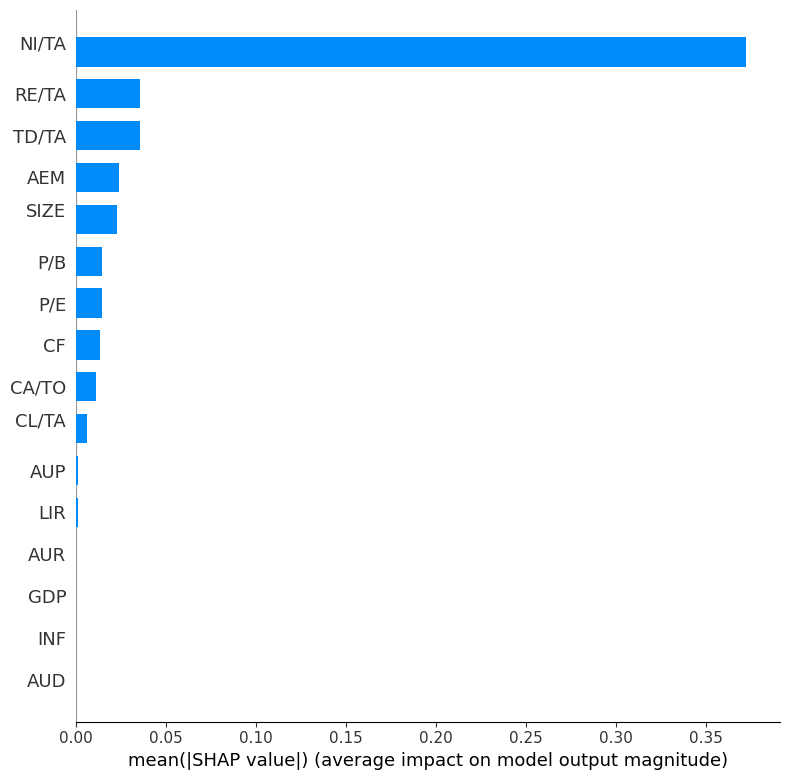

In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import shap

# Define the parameters for the Decision Tree model
tree_params = {
    'max_depth': None,
    'min_samples_leaf': 4,
    'min_samples_split': 5
}

# Train a Decision Tree model with the specified parameters
tree_model = DecisionTreeRegressor(**tree_params)
tree_model.fit(x_train_scaled, y_train)

# Convert x_train_scaled to a pandas DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# Create a SHAP TreeExplainer for the Decision Tree model
tree_explainer = shap.TreeExplainer(tree_model)

# Calculate the SHAP values for the Decision Tree model
tree_shap_values = tree_explainer.shap_values(x_train_scaled_df)

# Plot feature importance for Decision Tree
tree_feature_names = x_train_scaled_df.columns
shap.summary_plot(tree_shap_values, x_train_scaled_df, plot_type='bar', feature_names=tree_feature_names, show=False)

# Retrieve the importance values and feature names
tree_importance_values = np.abs(tree_shap_values).mean(axis=0)
non_zero_indices = tree_importance_values > 0
tree_feature_names = x_train_scaled_df.columns[non_zero_indices]
tree_importance_values = tree_importance_values[non_zero_indices]

# Plot feature importance with SHAP values on the right
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size
ax.barh(np.arange(len(tree_feature_names)), tree_importance_values)
ax.set_yticks(np.arange(len(tree_feature_names)))
ax.set_yticklabels(tree_feature_names)
ax.invert_yaxis()
ax.set_xlabel('mean(|SHAP value|)')

# Add SHAP values on the right
for i, v in enumerate(tree_importance_values):
    ax.text(v + 0.01, i, f'{v:.4f}')

# Set larger margins
plt.margins(0.1)

# Get the current directory
current_dir = os.getcwd()

# Save the plot as PNG in the current directory
plt.savefig(os.path.join(current_dir, 'decision_tree_shap.png'), bbox_inches='tight')
plt.close()

# Define the parameters for the Gradient Boosting model
gb_params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100
}

# Train a Gradient Boosting model with the specified parameters
gb_model = GradientBoostingRegressor(**gb_params)
gb_model.fit(x_train_scaled, y_train)

# Create a SHAP TreeExplainer for the Gradient Boosting model
gb_explainer = shap.TreeExplainer(gb_model)

# Calculate the SHAP values for the Gradient Boosting model
gb_shap_values = gb_explainer.shap_values(x_train_scaled_df)

# Plot feature importance for Gradient Boosting
gb_feature_names = x_train_scaled_df.columns
shap.summary_plot(gb_shap_values, x_train_scaled_df, plot_type='bar', feature_names=gb_feature_names, show=False)

# Retrieve the importance values and feature names
gb_importance_values = np.abs(gb_shap_values).mean(axis=0)
non_zero_indices = gb_importance_values > 0
gb_feature_names = x_train_scaled_df.columns[non_zero_indices]
gb_importance_values = gb_importance_values[non_zero_indices]

# Plot feature importance with SHAP values on the right
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size
ax.barh(np.arange(len(gb_feature_names)), gb_importance_values)
ax.set_yticks(np.arange(len(gb_feature_names)))
ax.set_yticklabels(gb_feature_names)
ax.invert_yaxis()
ax.set_xlabel('Feature Importance')

# Add SHAP values on the right
for i, v in enumerate(gb_importance_values):
    ax.text(v + 0.01, i, f'{v:.4f}')

# Set larger margins
plt.margins(0.1)

# Save the plot as PNG in the current directory
plt.savefig(os.path.join(current_dir, 'gradient_boosting_shap.png'), bbox_inches='tight')
plt.close()


### Rerun model with Hyperparameter tuning

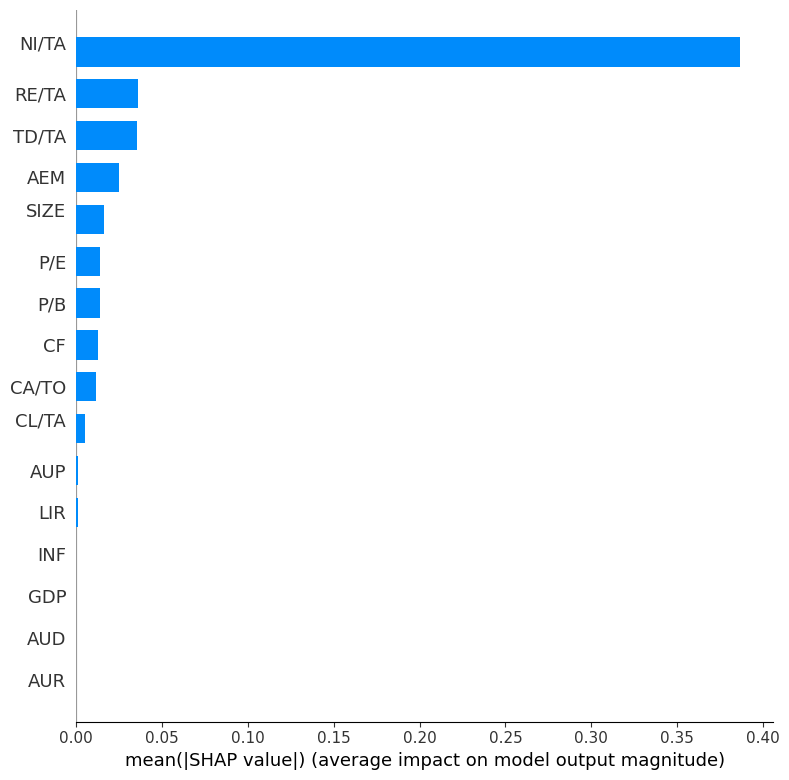

In [58]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import shap

# Define the parameters for the Decision Tree model
tree_params = {
    'max_depth': None,
    'min_samples_leaf': 4,
    'min_samples_split': 5
}

# Train a Decision Tree model with the specified parameters
tree_model = DecisionTreeRegressor(**tree_params)
tree_model.fit(x_train_scaled, y_train)

# Convert x_train_scaled to a pandas DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# Create a SHAP TreeExplainer for the Decision Tree model
tree_explainer = shap.TreeExplainer(tree_model)

# Calculate the SHAP values for the Decision Tree model
tree_shap_values = tree_explainer.shap_values(x_train_scaled_df)

# Plot feature importance for Decision Tree
tree_feature_names = x_train_scaled_df.columns
shap.summary_plot(tree_shap_values, x_train_scaled_df, plot_type='bar', feature_names=tree_feature_names, show=False)

# Retrieve the importance values and feature names
tree_importance_values = np.abs(tree_shap_values).mean(axis=0)
non_zero_indices = tree_importance_values > 0
tree_feature_names = x_train_scaled_df.columns[non_zero_indices]
tree_importance_values = tree_importance_values[non_zero_indices]

# Plot feature importance with SHAP values on the right
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size
ax.barh(np.arange(len(tree_feature_names)), tree_importance_values)
ax.set_yticks(np.arange(len(tree_feature_names)))
ax.set_yticklabels(tree_feature_names)
ax.invert_yaxis()
ax.set_xlabel('mean(|SHAP value|)')

# Add SHAP values on the right
for i, v in enumerate(tree_importance_values):
    ax.text(v + 0.01, i, f'{v:.4f}')

# Set larger margins
plt.margins(0.1)

# Get the current directory
current_dir = os.getcwd()

# Save the plot as JPEG in the current directory
plt.title("SHAP on Decision Tree Model")
plt.savefig(os.path.join(current_dir, 'decision_tree_shap.jpg'), bbox_inches='tight')
plt.close()

# Define the parameters for the Gradient Boosting model
gb_params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100
}

# Train a Gradient Boosting model with the specified parameters
gb_model = GradientBoostingRegressor(**gb_params)
gb_model.fit(x_train_scaled, y_train)

# Create a SHAP TreeExplainer for the Gradient Boosting model
gb_explainer = shap.TreeExplainer(gb_model)

# Calculate the SHAP values for the Gradient Boosting model
gb_shap_values = gb_explainer.shap_values(x_train_scaled_df)

# Plot feature importance for Gradient Boosting
gb_feature_names = x_train_scaled_df.columns
shap.summary_plot(gb_shap_values, x_train_scaled_df, plot_type='bar', feature_names=gb_feature_names, show=False)

# Retrieve the importance values and feature names
gb_importance_values = np.abs(gb_shap_values).mean(axis=0)
non_zero_indices = gb_importance_values > 0
gb_feature_names = x_train_scaled_df.columns[non_zero_indices]
gb_importance_values = gb_importance_values[non_zero_indices]

# Plot feature importance with SHAP values on the right
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size
ax.barh(np.arange(len(gb_feature_names)), gb_importance_values)
ax.set_yticks(np.arange(len(gb_feature_names)))
ax.set_yticklabels(gb_feature_names)
ax.invert_yaxis()
ax.set_xlabel('mean(|SHAP value|)')

# Add SHAP values on the right
for i, v in enumerate(gb_importance_values):
    ax.text(v + 0.01, i, f'{v:.4f}')

# Set larger margins
plt.margins(0.1)

# Save the plot as JPEG in the current directory
plt.title("SHAP on Gradient Boosting Model")
plt.savefig(os.path.join(current_dir, 'gradient_boosting_shap.jpg'), bbox_inches='tight')
plt.close()


In [50]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

,Model,Confusion Matrix,Recall,Precision,AUC,Accuracy
0,Decision Tree,"[[6, 5], [1, 57]]",0.982759,0.919355,0.764107,0.913043
1,Gradient Boosting,"[[4, 7], [1, 57]]",0.982759,0.890625,0.673197,0.884058
2,Logistic Regression,"[[7, 4], [4, 54]]",0.931034,0.931034,0.783699,0.884058


### Hyperparameter Tuning for Decision Tree & Ensemble Methods

In [34]:
from sklearn.model_selection import GridSearchCV

In [47]:
# Decision Tree hyperparameter tuning
decision_tree = DecisionTreeClassifier()
decision_tree_params = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_tree_grid = GridSearchCV(decision_tree, decision_tree_params, scoring='recall',cv=5)
decision_tree_grid.fit(x_train_scaled, y_train)

decision_tree_results = pd.DataFrame(decision_tree_grid.cv_results_)
decision_tree_best_params = decision_tree_grid.best_params_
decision_tree_best_score = decision_tree_grid.best_score_

decision_tree_best_params


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['lbfgs','saga','liblinear']
}

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1500)

# Create a GridSearchCV object with the logistic regression classifier and the parameter grid
grid_search = GridSearchCV(logistic_regression, param_grid, scoring='recall', cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


The max_iter was reached which means the coef_ did not converge


Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8347368421052632



15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Surface\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_sol

In [ ]:
# Gradient Boosting hyperparameter tuning
gradient_boosting = GradientBoostingClassifier()
gradient_boosting_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}
gradient_boosting_grid = GridSearchCV(gradient_boosting, gradient_boosting_params, scoring='recall',cv=5)
gradient_boosting_grid.fit(x_train_scaled, y_train)

gradient_boosting_results = pd.DataFrame(gradient_boosting_grid.cv_results_)
gradient_boosting_best_params = gradient_boosting_grid.best_params_
gradient_boosting_best_score = gradient_boosting_grid.best_score_

OSError: [Errno 22] Invalid argument: 'gradient_boosting_results.csv'

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Combine the current directory with the filename
file_path = os.path.join(current_directory, 'gradient_boosting_results.csv')

# Save the DataFrame to the file
gradient_boosting_results.to_csv(file_path, index=False)
